Importazione delle librerie utili

In [1]:
import sklearn
import pandas
import numpy
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

Lettura dei dati

In [2]:
#leggo i dati di training
f1 = pandas.read_csv('train.csv')
#leggo i dati di test
f2 = pandas.read_csv('test.csv')

Conversione e analisi dei dati

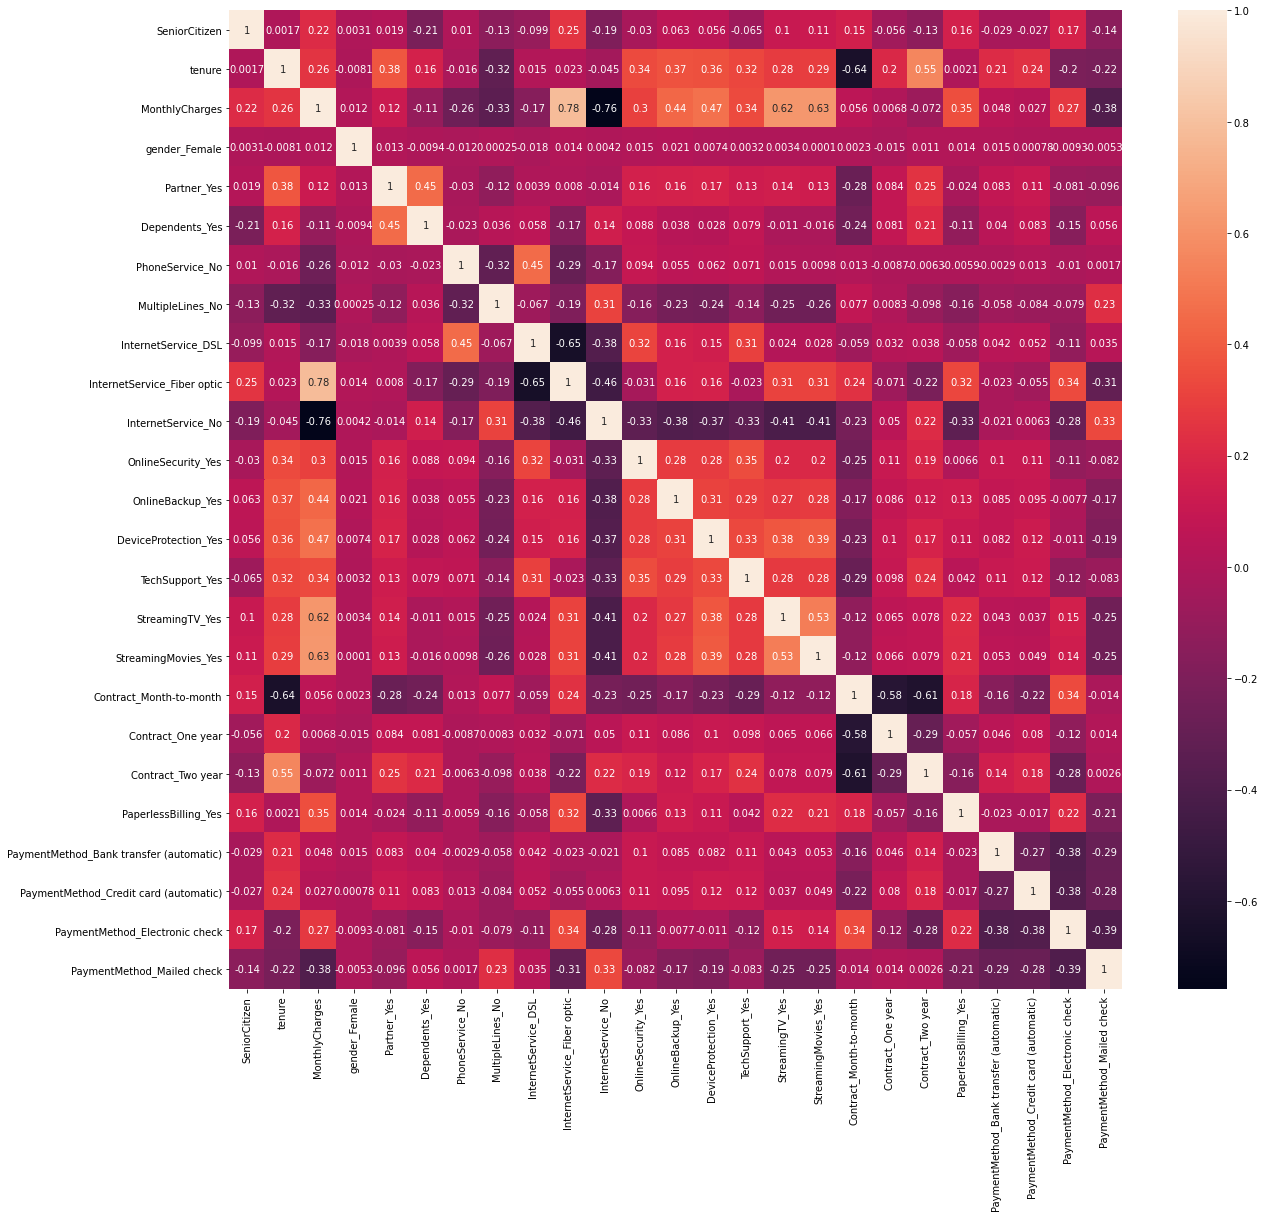

In [8]:
#separo i dati dal "risultato" per quanto riguarda i dati di training
dati_training_stringa = f1.drop(['Unnamed: 0','Churn'], axis = 1)
target_training = f1['Churn']

#separo i dati dal "risultato" per quanto riguarda i dati di test
dati_test_stringa = f2.drop(['Unnamed: 0', 'Churn'], axis = 1)
target_test = f2['Churn']

#customerID sicuramente non influenza il valore di Churn, pertanto posso eliminare tale colonna
dati_training = dati_training_stringa.drop(['customerID'], axis = 1)

dati_training = pandas.concat([dati_training, pandas.get_dummies(dati_training['gender'], prefix = 'gender')], axis = 1)
dati_training = pandas.concat([dati_training, pandas.get_dummies(dati_training['Partner'], prefix = 'Partner')], axis = 1)
dati_training = pandas.concat([dati_training, pandas.get_dummies(dati_training['Dependents'], prefix = 'Dependents')], axis = 1)
dati_training = pandas.concat([dati_training, pandas.get_dummies(dati_training['PhoneService'], prefix = 'PhoneService')], axis = 1)
dati_training = pandas.concat([dati_training, pandas.get_dummies(dati_training['MultipleLines'], prefix = 'MultipleLines')], axis = 1)
dati_training = pandas.concat([dati_training, pandas.get_dummies(dati_training['InternetService'], prefix = 'InternetService')], axis = 1)
dati_training = pandas.concat([dati_training, pandas.get_dummies(dati_training['OnlineSecurity'], prefix = 'OnlineSecurity')], axis = 1)
dati_training = pandas.concat([dati_training, pandas.get_dummies(dati_training['OnlineBackup'], prefix = 'OnlineBackup')], axis = 1)
dati_training = pandas.concat([dati_training, pandas.get_dummies(dati_training['DeviceProtection'], prefix = 'DeviceProtection')], axis = 1)
dati_training = pandas.concat([dati_training, pandas.get_dummies(dati_training['TechSupport'], prefix = 'TechSupport')], axis = 1)
dati_training = pandas.concat([dati_training, pandas.get_dummies(dati_training['StreamingTV'], prefix = 'StreamingTV')], axis = 1)
dati_training = pandas.concat([dati_training, pandas.get_dummies(dati_training['StreamingMovies'], prefix = 'StreamingMovies')], axis = 1)
dati_training = pandas.concat([dati_training, pandas.get_dummies(dati_training['Contract'], prefix = 'Contract')], axis = 1)
dati_training = pandas.concat([dati_training, pandas.get_dummies(dati_training['PaperlessBilling'], prefix = 'PaperlessBilling')], axis = 1)
dati_training = pandas.concat([dati_training, pandas.get_dummies(dati_training['PaymentMethod'], prefix = 'PaymentMethod')], axis = 1)
dati_training.drop(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], axis = 1, inplace = True)

dati_training = dati_training.replace(r'^\s*$', numpy.nan, regex=True)
pandas.to_numeric(dati_training['MonthlyCharges'])
pandas.to_numeric(dati_training['TotalCharges'])

#Possiamo sicuramente eliminare una colonna per ogni attributo che può avere solamente due valori:
dati_training = dati_training.drop(['gender_Male'], axis = 1)
dati_training = dati_training.drop(['Partner_No'], axis = 1)
dati_training = dati_training.drop(['Dependents_No'], axis = 1)
dati_training = dati_training.drop(['PhoneService_Yes'], axis = 1)
dati_training = dati_training.drop(['PaperlessBilling_No'], axis = 1)
#Posso anche eliminare le colonne il cui valore dipende da altre colonne:
dati_training = dati_training.drop(['MultipleLines_No phone service'], axis = 1)
dati_training = dati_training.drop(['OnlineSecurity_No internet service'], axis = 1)
dati_training = dati_training.drop(['OnlineBackup_No internet service'], axis = 1)
dati_training = dati_training.drop(['DeviceProtection_No internet service'], axis = 1)
dati_training = dati_training.drop(['TechSupport_No internet service'], axis = 1)
dati_training = dati_training.drop(['StreamingTV_No internet service'], axis = 1)
dati_training = dati_training.drop(['StreamingMovies_No internet service'], axis = 1)
#A questo punto posso eliminare una delle colonne degli attributi che hanno solo due valori possibili
dati_training = dati_training.drop(['MultipleLines_Yes'], axis = 1)
dati_training = dati_training.drop(['OnlineSecurity_No'], axis = 1)
dati_training = dati_training.drop(['OnlineBackup_No'], axis = 1)
dati_training = dati_training.drop(['DeviceProtection_No'], axis = 1)
dati_training = dati_training.drop(['TechSupport_No'], axis = 1)
dati_training = dati_training.drop(['StreamingTV_No'], axis = 1)
dati_training = dati_training.drop(['StreamingMovies_No'], axis = 1)

#Stampa del grafico che indica la correlazione tra i dati
corr_df = dati_training.corr(method='pearson')
plt.figure(figsize=(20, 18))
sns.heatmap(corr_df, annot=True)
plt.show()

A questo punto possiamo fare lo stesso per i dati di test

In [4]:
dati_test = dati_test_stringa.drop(['customerID'], axis = 1)
dati_test = pandas.concat([dati_test, pandas.get_dummies(dati_test['gender'], prefix = 'gender')], axis = 1)
dati_test = pandas.concat([dati_test, pandas.get_dummies(dati_test['Partner'], prefix = 'Partner')], axis = 1)
dati_test = pandas.concat([dati_test, pandas.get_dummies(dati_test['Dependents'], prefix = 'Dependents')], axis = 1)
dati_test = pandas.concat([dati_test, pandas.get_dummies(dati_test['PhoneService'], prefix = 'PhoneService')], axis = 1)
dati_test = pandas.concat([dati_test, pandas.get_dummies(dati_test['MultipleLines'], prefix = 'MultipleLines')], axis = 1)
dati_test = pandas.concat([dati_test, pandas.get_dummies(dati_test['InternetService'], prefix = 'InternetService')], axis = 1)
dati_test = pandas.concat([dati_test, pandas.get_dummies(dati_test['OnlineSecurity'], prefix = 'OnlineSecurity')], axis = 1)
dati_test = pandas.concat([dati_test, pandas.get_dummies(dati_test['OnlineBackup'], prefix = 'OnlineBackup')], axis = 1)
dati_test = pandas.concat([dati_test, pandas.get_dummies(dati_test['DeviceProtection'], prefix = 'DeviceProtection')], axis = 1)
dati_test = pandas.concat([dati_test, pandas.get_dummies(dati_test['TechSupport'], prefix = 'TechSupport')], axis = 1)
dati_test = pandas.concat([dati_test, pandas.get_dummies(dati_test['StreamingTV'], prefix = 'StreamingTV')], axis = 1)
dati_test = pandas.concat([dati_test, pandas.get_dummies(dati_test['StreamingMovies'], prefix = 'StreamingMovies')], axis = 1)
dati_test = pandas.concat([dati_test, pandas.get_dummies(dati_test['Contract'], prefix = 'Contract')], axis = 1)
dati_test = pandas.concat([dati_test, pandas.get_dummies(dati_test['PaperlessBilling'], prefix = 'PaperlessBilling')], axis = 1)
dati_test = pandas.concat([dati_test, pandas.get_dummies(dati_test['PaymentMethod'], prefix = 'PaymentMethod')], axis = 1)
dati_test.drop(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], axis = 1, inplace = True)
dati_test = dati_test.replace(r'^\s*$', numpy.nan, regex=True)
pandas.to_numeric(dati_test['MonthlyCharges'])
pandas.to_numeric(dati_test['TotalCharges'])
dati_test = dati_test.drop(['gender_Male'], axis = 1)
dati_test = dati_test.drop(['Partner_No'], axis = 1)
dati_test = dati_test.drop(['Dependents_No'], axis = 1)
dati_test = dati_test.drop(['PhoneService_Yes'], axis = 1)
dati_test = dati_test.drop(['PaperlessBilling_No'], axis = 1)
dati_test = dati_test.drop(['MultipleLines_No phone service'], axis = 1)
dati_test = dati_test.drop(['OnlineSecurity_No internet service'], axis = 1)
dati_test = dati_test.drop(['OnlineBackup_No internet service'], axis = 1)
dati_test = dati_test.drop(['DeviceProtection_No internet service'], axis = 1)
dati_test = dati_test.drop(['TechSupport_No internet service'], axis = 1)
dati_test = dati_test.drop(['StreamingTV_No internet service'], axis = 1)
dati_test = dati_test.drop(['StreamingMovies_No internet service'], axis = 1)
dati_test = dati_test.drop(['MultipleLines_Yes'], axis = 1)
dati_test = dati_test.drop(['OnlineSecurity_No'], axis = 1)
dati_test = dati_test.drop(['OnlineBackup_No'], axis = 1)
dati_test = dati_test.drop(['DeviceProtection_No'], axis = 1)
dati_test = dati_test.drop(['TechSupport_No'], axis = 1)
dati_test = dati_test.drop(['StreamingTV_No'], axis = 1)
dati_test = dati_test.drop(['StreamingMovies_No'], axis = 1)

Addestramento modello ed emissione dell'accuracy

In [5]:
from sklearn.tree import DecisionTreeClassifier

imp = SimpleImputer(missing_values=numpy.nan, strategy='mean')
imp = imp.fit(dati_training)
dati_training_imp = imp.transform(dati_training)

tree = DecisionTreeClassifier()
tree.fit(dati_training_imp, target_training)
print("Accuracy on training set: {:.3f}".format(tree.score(dati_training_imp, target_training)))

dati_test_imp = imp.transform(dati_test)
print("Accuracy on test set: {:.3f}".format(tree.score(dati_test_imp, target_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.731
